In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../FinalDatasets/RdatasetCPM.csv')
cumPpt = pd.read_csv('../FinalDatasets/cumPPT.csv')
cumEsals = pd.read_csv('../FinalDatasets/cumEsals.csv')
meanMaxT = pd.read_csv('../FinalDatasets/meanMaxT.csv')
meanMinT = pd.read_csv('../FinalDatasets/meanMinT.csv')

In [3]:
df = df[df.sYear < 2014]
len(df[df.sYear < 2014]) == len(df)

True

In [4]:
col_index = cumPpt.ID.unique()
print len(col_index) == len(cumPpt)

True


In [5]:
cumPpt.index = col_index
cumEsals.index = col_index
meanMaxT.index = col_index
meanMinT.index = col_index

In [6]:
#cleaned dataset: removed rows which have no weather data
ds = df[df.ID.isin(col_index)]
print len(ds), len(df)

182518 196493


In [7]:
def popPPT(row):
    index = row['UID']
    year  = row['sYear']
    val   = str(year)
    return cumPpt.loc[index, val]
ds.loc[:, 'cumPPT'] = ds.apply(popPPT, axis = 1)

/Users/Alan/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Alan/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
def popMinT(row):
    index = row['UID']
    year  = row['sYear']
    val   = str(year)
    return meanMinT.loc[index, val]
ds.loc[:, 'meanMinTemp'] = ds.apply(popMinT, axis = 1)

In [9]:
def popMaxT(row):
    index = row['UID']
    year  = row['sYear']
    val   = str(year)
    return meanMaxT.loc[index, val]
ds.loc[:, 'meanMaxTemp'] = ds.apply(popMaxT, axis = 1)

In [10]:
def popCumEsals(row):
    index = row['UID']
    year  = row['sYear']
    val   = str(year)
    return cumEsals.loc[index, val]
ds.loc[:, 'cumESALs'] = ds.apply(popCumEsals, axis = 1)

In [11]:
ds.head()

,Year,ID,UID,sYear,Rutting,IRI,PSC,AlliP,LongP,Trans_Cracking,IsBridge,sfThick,Tthick,TSfThick,STcode,AlliPred,cumPPT,meanMinTemp,meanMaxTemp,cumESALs
0,1981,222,222,1981,0.236,15.836577,92,0.000000,3.960055,5,1,0.00,0.15,0.15,PA,1.910057,1690.469971,1.31,26.850000,57829.947364
1,1981,540,540,1981,0.236,18.840242,83,0.000000,0.000000,0,0,0.15,1.65,0.90,Other,2.126044,2157.649902,-2.84,25.230000,35421.157984
2,1981,2431,2431,1981,0.512,20.429158,37,5.965909,14.962121,37,0,0.15,1.56,0.98,BA,7.894043,337.529999,-5.94,31.230000,58882.558639
3,1981,704,704,1981,0.236,7.654330,40,0.000000,64.962121,0,0,0.65,1.75,1.00,Other,10.134499,1980.089966,-6.77,23.930000,28915.396971
4,1981,776,776,1981,0.236,11.085579,48,3.977273,9.974747,10,0,0.50,2.15,0.65,BA,3.722601,1099.699951,-6.72,28.370001,35606.843246


# Adding Freeze-Thaw Cycles

In [12]:
rdat = pd.read_csv('../FinalDatasets/RoughnessCrackingDataset.csv')

In [13]:
rdf = rdat[['UID','Latitude', 'Longitude']]

In [14]:
ndf = rdf[rdf.UID.isin(col_index)]
ndf = ndf.drop_duplicates(subset = 'UID')

In [15]:
ndf.index = np.arange(len(ndf))+1
print len(ndf) == len(cumPpt)

True


In [16]:
ndf.to_csv('../FinalDatasets/cmp_seg_icao_matching.csv')

In [17]:
cpmSegAp = pd.read_csv('../FinalDatasets/CPM_seg_icao.csv')

In [18]:
print len(cpmSegAp) == len(ndf)

True


In [19]:
cpmSegAp.index = ndf.UID

In [20]:
cpmSegAp.head()

,InputID,TargetID,Distance
UID,,,
222,1,KAWO,0.469535
540,2,KESW,0.465864
2431,3,KSKA,0.657846
704,4,KESW,0.552878
776,5,KESW,0.621369


In [21]:
wds = pd.read_excel('../DataFiles/AnnualWeatherR.xlsx') #contains yrs 1981 -1999
wds2 = pd.read_excel('../DataFiles/AnnualWeatherR2.xlsx') # runs from 2000-2013

In [22]:
# combining the datasets
wd = wds[['Year', 'FTCycles', 'Airport']]
wdt = pd.concat([wd, wds2], axis = 0)

In [23]:
#checking that combination code was accurate
len(wdt) == len(wd)+len(wds2)

True

In [24]:
wdt.head()

,Year,FTCycles,Airport
0,1986,4,KBFI
1,1987,5,KBFI
2,1984,9,KBFI
3,1985,16,KBFI
4,1982,8,KBFI


In [25]:
ft = wdt.pivot('Airport', 'Year', 'FTCycles')

In [26]:
ft.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Airport,,,,,,,,,,,,,,,,,,,,,
KALW,0,12,30,25,23,48,26,23,22,28,...,18,26,8,24,24,25,15,19,24,22
KAWO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KBFI,8,3,8,5,9,16,4,5,0,8,...,4,4,3,7,14,13,4,6,11,2
KBLI,13,4,12,5,11,16,9,8,9,14,...,6,12,8,15,24,13,5,14,19,5
KCLM,0,2,1,1,7,7,6,5,5,7,...,2,9,7,13,26,13,8,12,12,5


The following code identifies the points in time at which major rehabilitation occured.

In [27]:
Ryrs = rdat[['UID', 'Major Rehab Year', 'Prior Major Rehab Year']]
Ryrs = Ryrs[Ryrs.UID.isin(col_index)]
Ryrs.columns = ['UID', 'MRYear', 'PMRYear']
Ryrs = Ryrs.drop_duplicates(subset = 'UID')
Ryrs.index = Ryrs.UID

In [28]:
import math
def removeNan(row):
    val = row['PMRYear']
    if math.isnan(val):
        return 1900
    return val
Ryrs.loc[:, 'PriorRehab'] = Ryrs.apply(removeNan, axis = 1)

In [29]:
Ryrs.head()

,UID,MRYear,PMRYear,PriorRehab
UID,,,,
222,222,2000,1989,1989
540,540,1998,1984,1984
2431,2431,1999,1987,1987
704,704,2014,2003,2003
776,776,2003,1997,1997


In [30]:
def getCode(row):
    index = row['UID']
    return cpmSegAp.loc[index,'TargetID']

In [31]:
Ryrs.loc[:, 'ICAO'] = Ryrs.apply(getCode, axis =1)

In [32]:
ft.loc[:,'ICAO'] = ft.index

In [33]:
ft.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,ICAO
Airport,,,,,,,,,,,,,,,,,,,,,
KALW,0,12,30,25,23,48,26,23,22,28,...,26,8,24,24,25,15,19,24,22,KALW
KAWO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KAWO
KBFI,8,3,8,5,9,16,4,5,0,8,...,4,3,7,14,13,4,6,11,2,KBFI
KBLI,13,4,12,5,11,16,9,8,9,14,...,12,8,15,24,13,5,14,19,5,KBLI
KCLM,0,2,1,1,7,7,6,5,5,7,...,9,7,13,26,13,8,12,12,5,KCLM


In [34]:
ftdb = pd.merge(Ryrs, ft, how ='left', left_on =['ICAO'], right_on = 'ICAO')

In [35]:
ftdb.head()

,UID,MRYear,PMRYear,PriorRehab,ICAO,1980,1981,1982,1983,1984,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,222,2000,1989,1989,KAWO,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,540,1998,1984,1984,KESW,99,109,124,110,147,...,117,99,116,131,132,79,115,104,54,38
2,2431,1999,1987,1987,KSKA,49,34,67,49,59,...,40,37,54,64,73,60,56,78,92,84
3,704,2014,2003,2003,KESW,99,109,124,110,147,...,117,99,116,131,132,79,115,104,54,38
4,776,2003,1997,1997,KESW,99,109,124,110,147,...,117,99,116,131,132,79,115,104,54,38


In [88]:
def cumVal(row):
    ix = row['UID']
    l = np.array(row[['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', 
                      '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                     '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
                     '2011', '2012', '2013']])
    pmr = int(row['PriorRehab'])
    if pmr > 1981:
        p1 = pmr - 1981
    else:
        p1 =0
    mr  = int(row['MRYear'])
    if (mr > 1981) & (mr < 2014):
        p2 = mr - 1981
    else:
        p2 =0
        
    if (p1 ==0) & (p2==0):
        res = list(np.cumsum(l))
        
    elif p1 == 0:
        l1 = list(np.cumsum(l[0:p2]))
        l2 = list(np.cumsum(l[p2:]))
        res = l1 + l2
    else:
        l1 = list(np.cumsum(l[0:p1]))
        l2 = list(np.cumsum(l[p1:p2]))
        l3 = list(np.cumsum(l[p2:]))
        res = l1 + l2 + l3
        
    return ix, res

In [72]:
distributeResultToColumns = lambda x: pd.Series(([i for i in x[:1]] + [j for j in x[1:][0]]))
colNames = np.concatenate((np.array(['UID']),ftdb.columns[5:]), axis = 0)
def getCumVarDataset(df):
    rdf = df.apply(cumVal, axis = 1)
    rdf = pd.DataFrame(rdf)
    rdf.columns = ['Results']
    newdf = rdf['Results'].apply(distributeResultToColumns)
    output = newdf[range(35)]
    output.columns = colNames
    return output

In [71]:
np.concatenate((np.array(['UID']),ftdb.columns[5:]), axis = 0)

array(['UID', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013], dtype=object)

In [79]:
np.arange(34)+1980

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [89]:
ftdb.columns = [ u'UID',     u'MRYear',    u'PMRYear', u'PriorRehab',  u'ICAO', '1980', '1981', '1982', 
                '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', 
                '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
                '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

In [90]:
cumFTCycles   = getCumVarDataset(ftdb)

In [92]:
cumFTCycles.index = cumFTCycles.UID
cumFTCycles.head()

,UID,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
UID,,,,,,,,,,,,,,,,,,,,,
222,222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540,540,99,208,332,110,257,359,480,574,683,...,995,1094,1210,1341,1473,1552,1667,1771,1825,1863
2431,2431,49,83,150,199,258,335,52,101,149,...,391,428,482,546,619,679,735,813,905,989
704,704,99,208,332,442,589,691,812,906,1015,...,332,442,589,691,812,906,1015,1083,1186,1303
776,776,99,208,332,442,589,691,812,906,1015,...,366,465,581,712,844,923,1038,1142,1196,1234


In [93]:
def popCumFTC(row):
    index = row['UID']
    year  = row['sYear']
    val   = year
    return cumFTCycles.loc[index, val]
ds.loc[:, 'cumFTC'] = ds.apply(popCumFTC, axis = 1)

In [94]:
ds.head()

,Year,ID,UID,sYear,Rutting,IRI,PSC,AlliP,LongP,Trans_Cracking,...,sfThick,Tthick,TSfThick,STcode,AlliPred,cumPPT,meanMinTemp,meanMaxTemp,cumESALs,cumFTC
0,1981,222,222,1981,0.236,15.836577,92,0.000000,3.960055,5,...,0.00,0.15,0.15,PA,1.910057,1690.469971,1.31,26.850000,57829.947364,0
1,1981,540,540,1981,0.236,18.840242,83,0.000000,0.000000,0,...,0.15,1.65,0.90,Other,2.126044,2157.649902,-2.84,25.230000,35421.157984,208
2,1981,2431,2431,1981,0.512,20.429158,37,5.965909,14.962121,37,...,0.15,1.56,0.98,BA,7.894043,337.529999,-5.94,31.230000,58882.558639,83
3,1981,704,704,1981,0.236,7.654330,40,0.000000,64.962121,0,...,0.65,1.75,1.00,Other,10.134499,1980.089966,-6.77,23.930000,28915.396971,208
4,1981,776,776,1981,0.236,11.085579,48,3.977273,9.974747,10,...,0.50,2.15,0.65,BA,3.722601,1099.699951,-6.72,28.370001,35606.843246,208


In [95]:
ds.to_csv('../FinalDatasets/CPMdataset1007.csv')

In [48]:
ftdb.iloc[3, np.arange(39)[5:]]

1980     99
1981    109
1982    124
1983    110
1984    147
1985    102
1986    121
1987     94
1988    109
1989     68
1990    103
1991    117
1992     90
1993    101
1994    112
1995    106
1996    133
1997    117
1998    147
1999    127
2000     91
2001    147
2002    124
2003    125
2004    117
2005     99
2006    116
2007    131
2008    132
2009     79
2010    115
2011    104
2012     54
2013     38
Name: 3, dtype: object

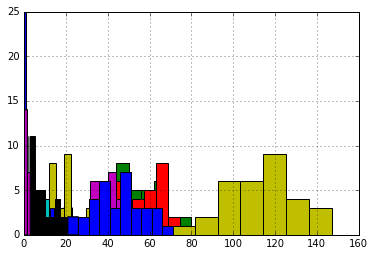

In [43]:
%matplotlib inline
for i in np.arange(15):
    n = int(np.random.randint(0, len(ftdb), 1))
    ftdb.iloc[n, np.arange(39)[5:]].hist()

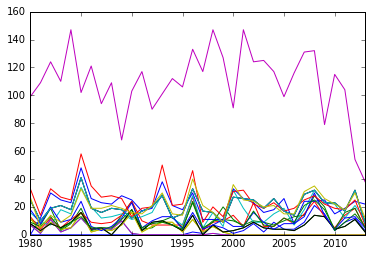

In [44]:
for i in np.arange(20):
    n = int(np.random.randint(0, len(ftdb), 1))
    ftdb.iloc[n, np.arange(39)[5:]].plot()

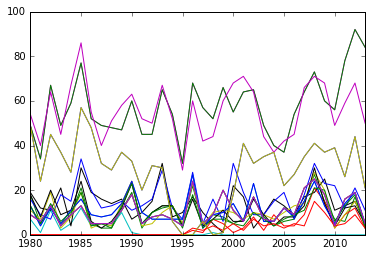

In [45]:
for i in np.arange(20):
    n = int(np.random.randint(0, len(ftdb), 1))
    ftdb.iloc[n, np.arange(39)[5:]].plot()

In [49]:
def getmean(row, df):
    index = int(row.idx)
    m = df.iloc[index, np.arange(39)[5:]].mean()
    return m
def getstd(row, df):
    index = int(row.idx)
    std = df.iloc[index, np.arange(39)[5:]].std()
    return std
def addMeanStd(ds, var):    
    ds.index = np.arange(len(ds))
    ds['idx'] = np.arange(len(ds))
    m_name = var + 'mean'
    std_name = var + 'std'
    ds[m_name] = ds.apply(getmean, axis = 1, args = (ds,))
    ds[std_name] = ds.apply(getstd, axis = 1, args = (ds,))

#adding the mean values and std for the respective variables
addMeanStd(ftdb, 'FTC')

In [51]:
ftdb.head()

,UID,MRYear,PMRYear,PriorRehab,ICAO,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,idx,FTCmean,FTCstd
0,222,2000,1989,1989,KAWO,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
1,540,1998,1984,1984,KESW,99,109,124,110,147,...,131,132,79,115,104,54,38,1,109.058824,24.197347
2,2431,1999,1987,1987,KSKA,49,34,67,49,59,...,64,73,60,56,78,92,84,2,57.235294,13.751163
3,704,2014,2003,2003,KESW,99,109,124,110,147,...,131,132,79,115,104,54,38,3,109.058824,24.197347
4,776,2003,1997,1997,KESW,99,109,124,110,147,...,131,132,79,115,104,54,38,4,109.058824,24.197347


In [50]:
wdb = pd.read_csv('../modelDatasets/weather_vars_stats.csv')

In [53]:
wdb.head()

,Unnamed: 0,ID,ESALmean,ESALstd,PPTmean,PPTstd,MINTmean,MINTstd,MAXTmean,MAXTstd
0,0,1,23496.869612,4884.604865,964.209355,154.203705,0.188065,1.393931,24.471613,1.182844
1,1,24,136028.254537,28277.991273,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242
2,2,27,83571.872262,17373.189728,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242
3,3,28,83571.872262,17373.189728,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242
4,4,32,91051.346892,18928.046982,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242


In [52]:
ftd = ftdb[['UID', 'FTCmean', 'FTCstd']]

In [54]:
merged_ds = pd.merge(wdb, ftd, how = 'left', left_on = 'ID', right_on = 'UID')
print len(merged_ds) == len(ftd)

True


In [55]:
merged_ds.head()

,Unnamed: 0,ID,ESALmean,ESALstd,PPTmean,PPTstd,MINTmean,MINTstd,MAXTmean,MAXTstd,UID,FTCmean,FTCstd
0,0,1,23496.869612,4884.604865,964.209355,154.203705,0.188065,1.393931,24.471613,1.182844,1,10.735294,6.214884
1,1,24,136028.254537,28277.991273,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242,24,10.735294,6.214884
2,2,27,83571.872262,17373.189728,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242,27,10.735294,6.214884
3,3,28,83571.872262,17373.189728,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242,28,10.735294,6.214884
4,4,32,91051.346892,18928.046982,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242,32,10.735294,6.214884


In [57]:
weather_ds = merged_ds[[u'UID', u'ESALmean', u'ESALstd', u'PPTmean', u'PPTstd', u'MINTmean', 
                        u'MINTstd', u'MAXTmean', u'MAXTstd', u'FTCmean', u'FTCstd']]

In [58]:
weather_ds.to_csv('../modelDatasets/weather_vars_stats2.csv')